## Qual a relação entre duração e gênero?

In [15]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")
conn = sqlite3.connect("imdb.db")

In [16]:
consulta =  '''
            SELECT AVG(runtime_minutes) Runtime, genres
            FROM titles
            WHERE type ='movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            '''

resultado=pd.read_sql_query(consulta,conn)
resultado.head()

,Runtime,genres
0,99.364590,Action
1,77.000000,"Action,Adult"
2,69.000000,"Action,Adult,Adventure"
3,74.000000,"Action,Adult,Comedy"
4,84.666667,"Action,Adult,Crime"


In [17]:
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [18]:
generos_unicos = retorna_generos(resultado)
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [19]:
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM titles WHERE genres LIKE' + '\'' + '%' + item + '%' + '\' AND type = \'movie\' AND Runtime !=\'NAN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [20]:
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre']=generos_unicos
df_genero_runtime['runtime']=genero_runtime
df_genero_runtime.head()


,genre,runtime
0,action,93.0
1,adult,77.0
2,adventure,90.0
3,animation,82.0
4,biography,87.0


In [21]:
df_genero_runtime=df_genero_runtime.drop(index=18)
df_genero_runtime=df_genero_runtime.sort_values(by='runtime',ascending=False)

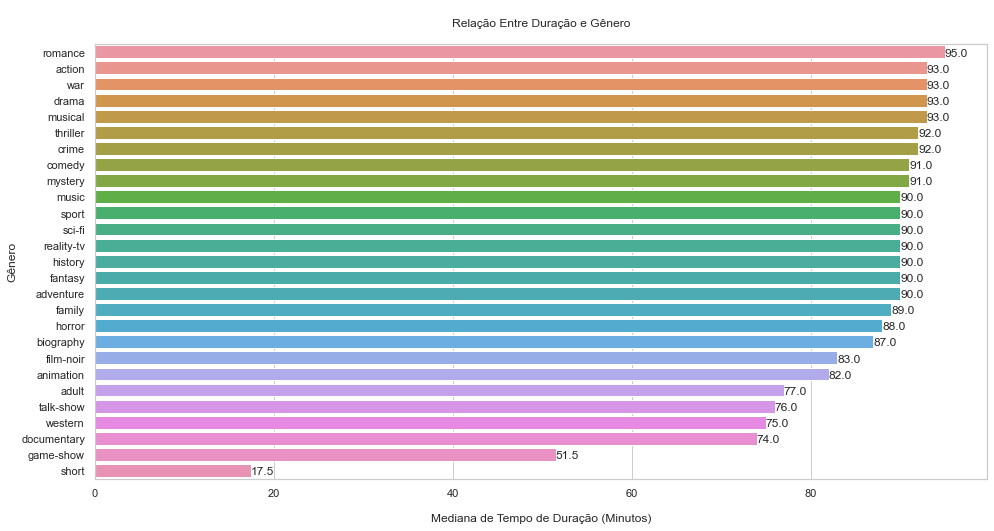

In [22]:
plt.figure(figsize=(16,8))
sns.barplot(y = df_genero_runtime.genre, x=df_genero_runtime.runtime,orient='h')
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()
